## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [29]:
df = pd.read_csv("QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [33]:
df.tail()

,DATE,TAG,POSTS
2519,2023-09-01 00:00:00,php,2099
2520,2023-09-01 00:00:00,python,10306
2521,2023-09-01 00:00:00,r,2197
2522,2023-09-01 00:00:00,ruby,214
2523,2023-09-01 00:00:00,swift,998


In [32]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [35]:
df.shape

(2524, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [38]:
df.count(0)

DATE     2524
TAG      2524
POSTS    2524
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [53]:
posts_per_language = df.groupby(by="TAG").sum()
posts_per_language.sort_values("POSTS",ascending=False)[:1]

<ipython-input-53-a0c8ebf771e3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  posts_per_language = df.groupby(by="TAG").sum()


,POSTS
TAG,
javascript,2513065


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [71]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,182,182
c,182,182
c#,183,183
c++,182,182
delphi,182,182
go,167,167
java,182,182
javascript,182,182
perl,182,182


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [85]:
df.DATE = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [100]:
reshaped_df = df.pivot(index="DATE", columns="TAG",values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,174.0,1049.0,3835.0,1782.0,114.0,417.0,4183.0,7775.0,54.0,1971.0,11802.0,2866.0,255.0,998.0
2023-06-01,155.0,889.0,3815.0,1815.0,117.0,521.0,4295.0,7540.0,54.0,1906.0,11290.0,2667.0,226.0,1133.0
2023-07-01,163.0,919.0,3882.0,1858.0,99.0,526.0,4083.0,7559.0,69.0,1754.0,11191.0,2364.0,224.0,1158.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [101]:
reshaped_df.shape

(183, 14)

In [102]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [115]:
reshaped_df.fillna(0, inplace=True)

In [114]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1640.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,955.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [112]:
reshaped_df.isna().values.any()

False

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [113]:
reshaped_df.count()

TAG
assembly      183
c             183
c#            183
c++           183
delphi        183
go            183
java          183
javascript    183
perl          183
php           183
python        183
r             183
ruby          183
swift         183
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

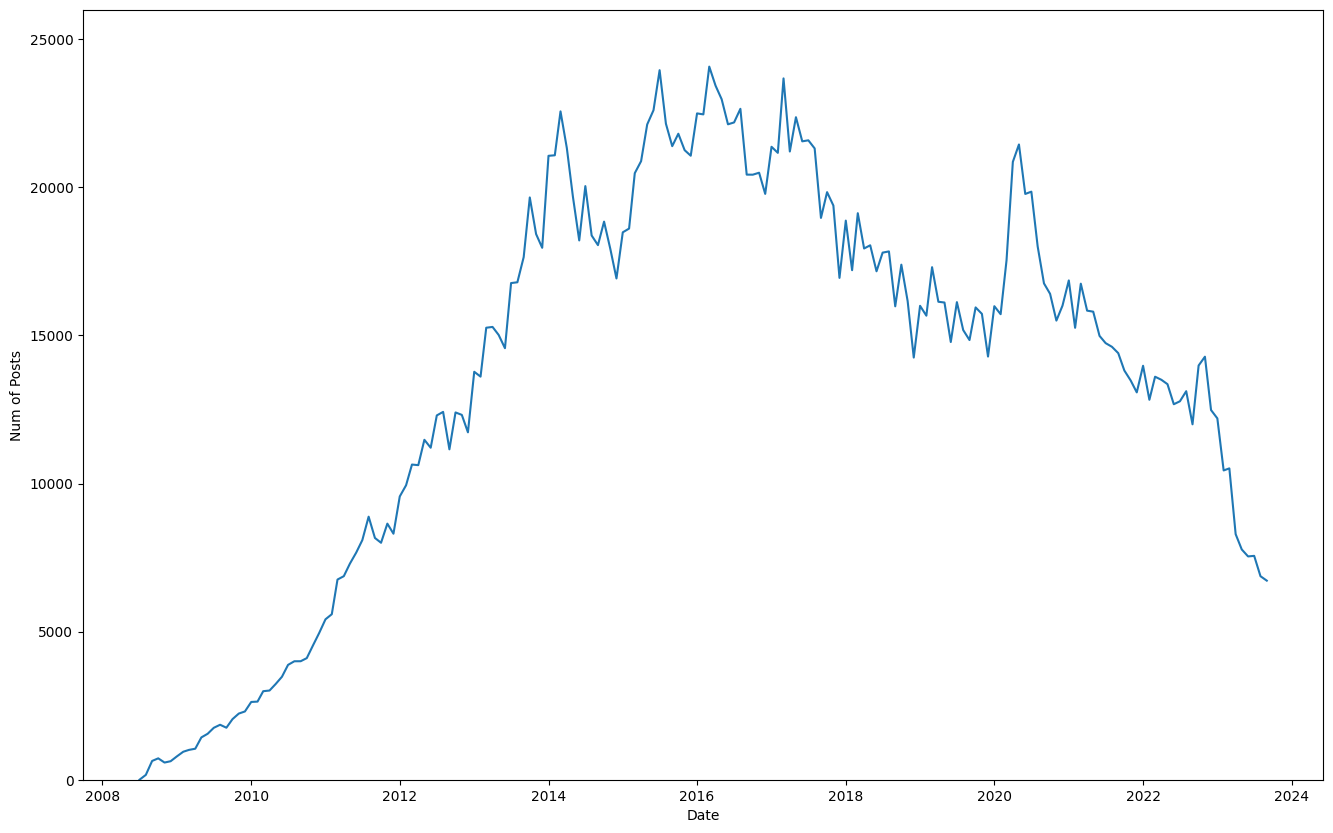

In [145]:
plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("Num of Posts")
plt.ylim(0, 26000)
plt.plot(reshaped_df.index, reshaped_df["javascript"])

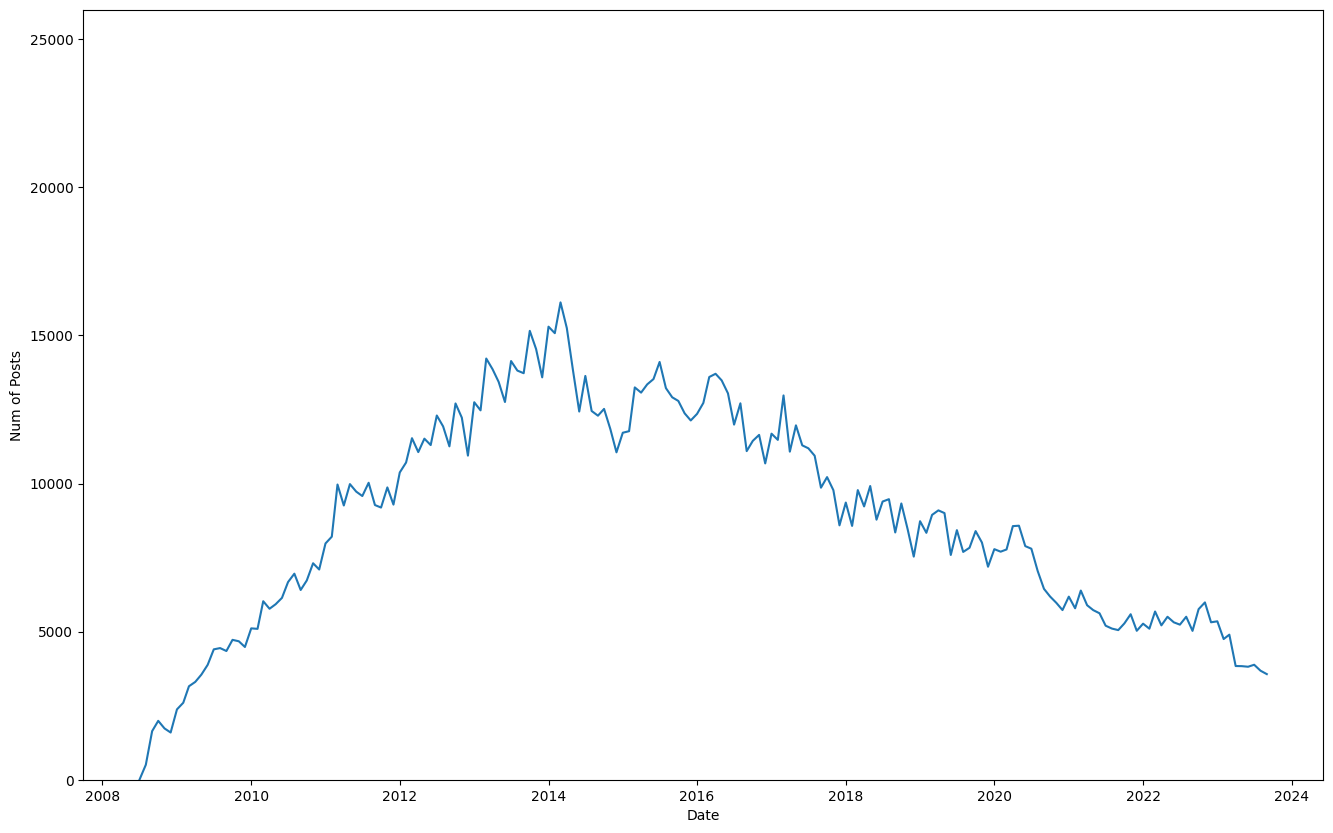

In [162]:
plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("Num of Posts")
plt.ylim(0, 26000)
plt.plot(reshaped_df.index, reshaped_df["c#"])

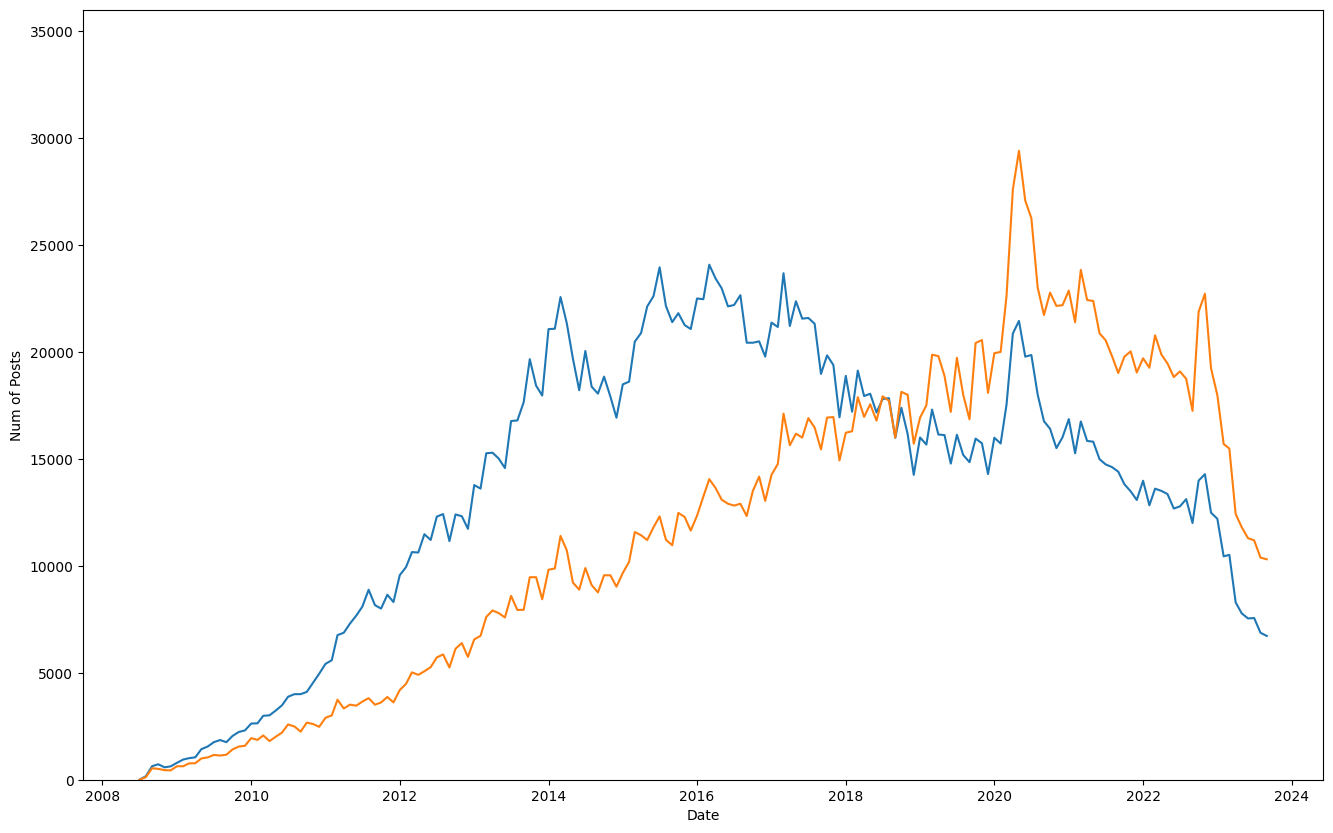

In [164]:
plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("Num of Posts")
plt.ylim(0, 36000)
plt.plot(reshaped_df.index, reshaped_df["javascript"])
plt.plot(reshaped_df.index, reshaped_df["python"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

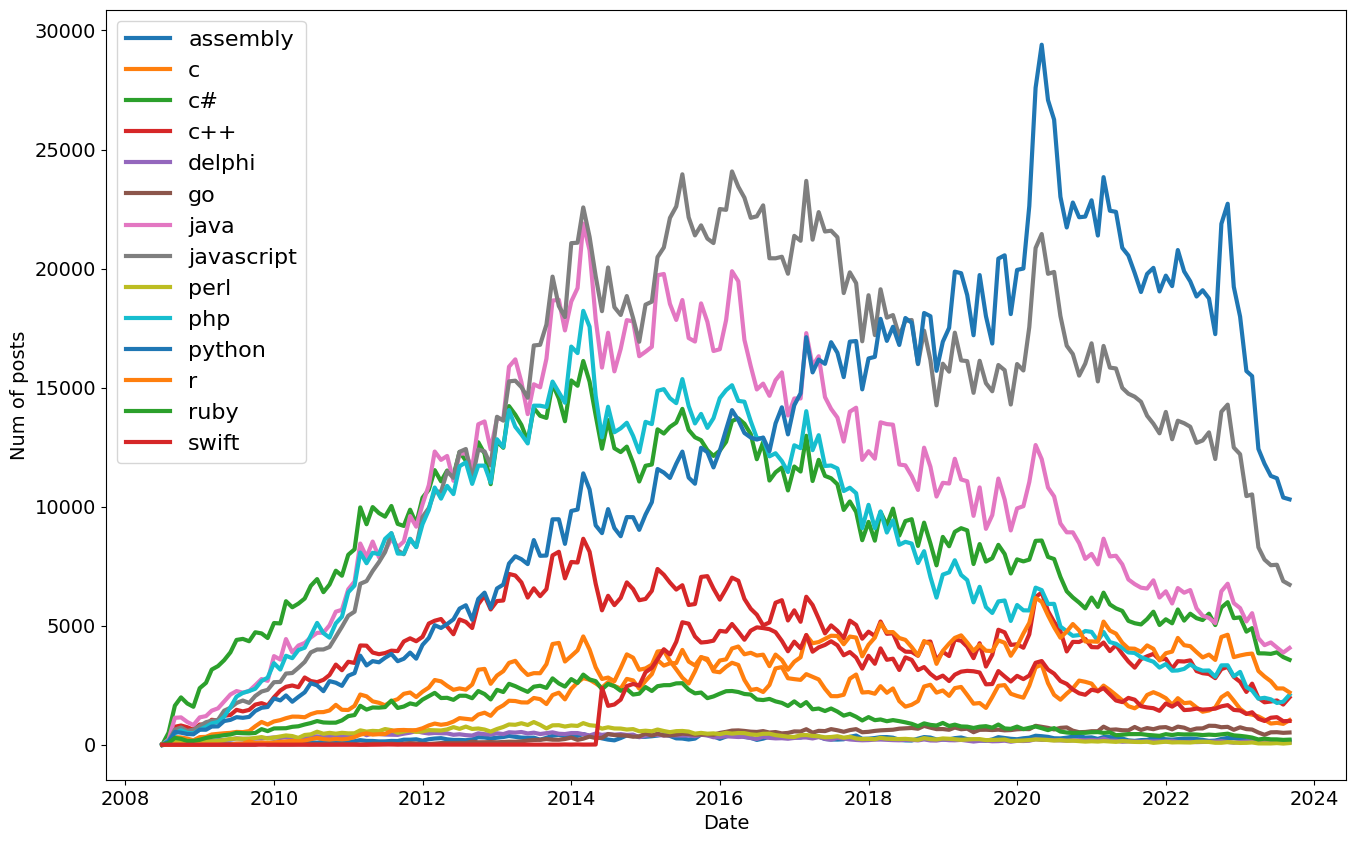

In [161]:
plt.figure(figsize=(16,10))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Num of posts", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],  linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

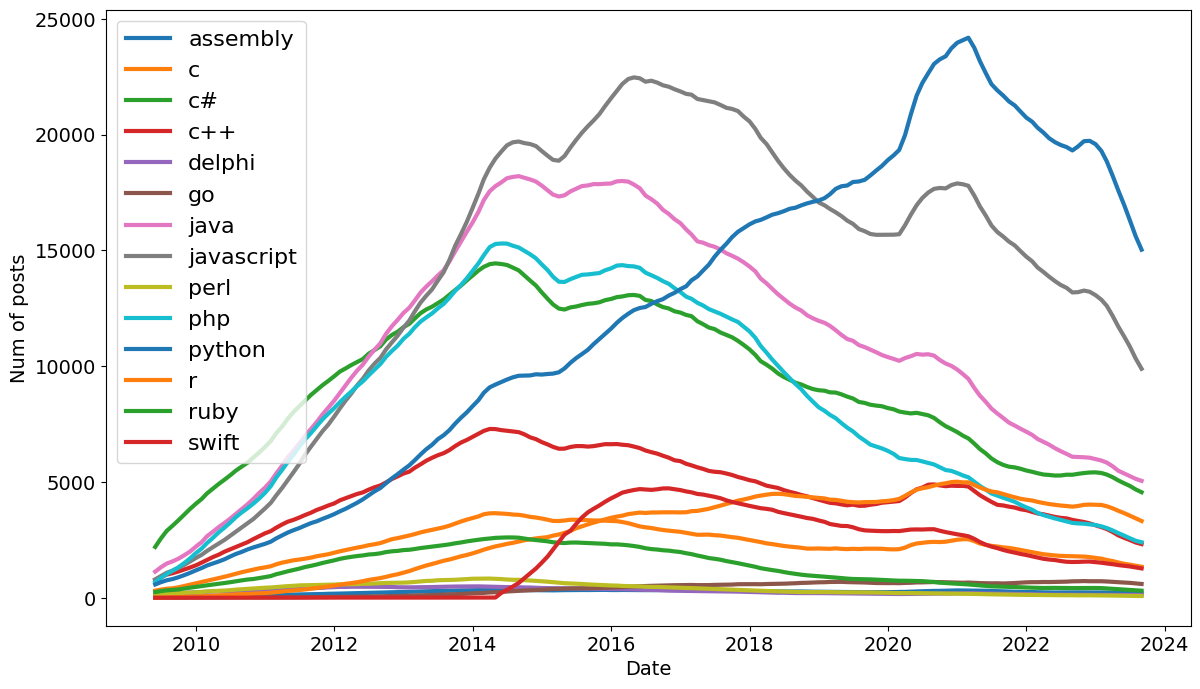

In [170]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(14,8))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Num of posts", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],  linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

In [189]:
# What was the most popular programming language from 2008 to 2012?
df.query("DATE < '2013-01-01'").groupby("TAG").sum().sort_values("POSTS",ascending=False)[:1]

<ipython-input-189-67d3c86fe2fc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.query("DATE < '2013-01-01'").groupby("TAG").sum().sort_values("POSTS",ascending=False)[:1]


,POSTS
TAG,
c#,378852


In [188]:
# What was the most popular programming language from 2015 to 2018?
df.query("DATE >= '2015-01-01' and DATE < '2019-01-01'").groupby("TAG").sum().sort_values("POSTS",ascending=False)[:1]

<ipython-input-188-fec7d544b315>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.query("DATE >= '2015-01-01' and DATE < '2019-01-01'").groupby("TAG").sum().sort_values("POSTS",ascending=False)[:1]


,POSTS
TAG,
javascript,975614


In [190]:
# What was the most popular programming language in 2020?
df.query("DATE == '2020'").groupby("TAG").sum().sort_values("POSTS",ascending=False)[:1]

<ipython-input-190-e1091e9b5f4a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.query("DATE == '2020'").groupby("TAG").sum().sort_values("POSTS",ascending=False)[:1]


,POSTS
TAG,
python,19942
